In [1]:
# Using ! to invoke the following shell command inside our notebook
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
Unpacking objects: 100% (6/6), done.


In [2]:
# The above cell cloned the data from the bitbucket server and created a folder
# called "german-traffic-sign". Now we list the data inside this folder
!ls german-traffic-signs/

signnames.csv  test.p  train.p	valid.p


As it can be seen there are 4 files. First one is a spreadsheet of sign name, and the other 3 files are pickle files, that contain our respective training, test and validation datasets.

In python to save something on disk, it can be pickled. That is it can be serialized before writing it to file. By serializing it, it converts all the object to a character stream.

Pickled file contain serialized data that can be unpickled when desired

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd
import random

In [4]:
np.random.seed(0)

In [5]:
# with keyword is used whenever we wish to execute two operations as a pair and
# invoke a block of code in between
# Here using "with", we will open a file, manipulate it and "with" will then
# automatically close the file.
with open('german-traffic-signs/train.p', 'rb') as f:
    train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
    val_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
    test_data = pickle.load(f)

if we print the type of our pickled datasets using
```
print(type(train_data))
```
we can see they are of type
```
<class 'dict'>
```
From the key value pairs of these dictionaries, two values are of our interest. One of them is *features*, and the other one is *labels*.

Feature key corresponds to values of training images in pixel representation, wherese the labels corresponds to an array of labels, which pretty much label each training image as belonging to some class

In [6]:
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

In [7]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


As it can be seen, we have roughly 35000 training images of size 32 by 32 pixels with depth of 3 (as our traffic signs despite the MNIST datasets are in RGB format, they have a depth of 3 for each of the 3 color channels: Red, Green and Blue).

Similarly, there are about 4500 validation and 12500 testing images.

We checked it here to make sure that they are consistent and are based on our expectations.

As we have imported these data from a repository, it is a good practice to verify that our dataset was imported correctly whenever our program is running.

In [8]:
# Assert that the number of images equal to the number of labels.
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels"
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels"

assert(X_train.shape[1:] == (32, 32, 3)), "The dimension of the images are not 32 x 32 x 3"
assert(X_val.shape[1:] == (32, 32, 3)), "The dimension of the images are not 32 x 32 x 3"
assert(X_test.shape[1:] == (32, 32, 3)), "The dimension of the images are not 32 x 32 x 3"

Now that we ensured that our imported data are accurate, we will plot and analyze our data so thta we can visualize and see how many traffic sign images are present from each class.

The file signnames.csv contains all of traffic sign classes in a csv (comma separated value) format. To manipulate and analyze data in such a csv file, we will use the python data science library called *pandas*.

In any data science project, often times we work with csv files. Today it becomes standard for data scientists to use pandas when importing data from csv files, and we do so using the *read_csv()* function which loads our data from a csv file

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

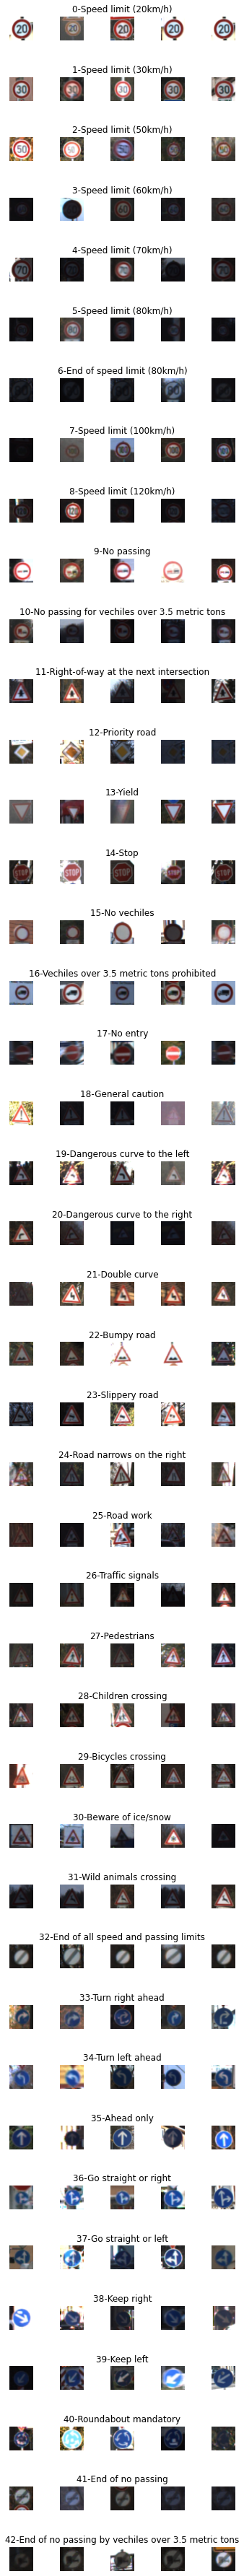

In [10]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
print(data)

num_of_samples = []
 
cols = 5
num_classes = 43  # 43 calsses available in dataset

fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))
fig.tight_layout()
for i in range(cols):
    # Iterate over entire dataframe rows as index and series pairs (index, Series)
    # Each index corresponds to the current index of the class being iterate
    # through, and all of that is being stored in placeholder j
    # Series is a 1 dimensional labeled array, which holds the relevant data for
    #  each row,like the sign name, its respective class and ... this will be
    #  stored in place holder row
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + "-" + row["SignName"])
            num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

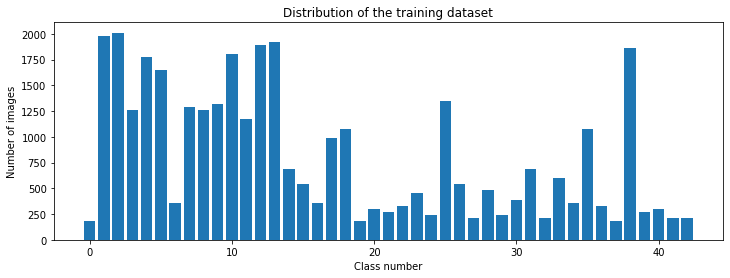

In [11]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

As it can be seen, our traffic sign data is much less uniform than the MNIST dataset that we have used before. Some classes have a larger number of training images belonging to them, while some classes have very little training images.

This means some classes might have less accurate results, as there are less data to train with.

As here the images are RGB with depth of 3 and in contrast with MNIST datasets have different lighting conditions and ..., we need to preprocess them to make them easier for our network to classify them.

(32, 32, 3)
36


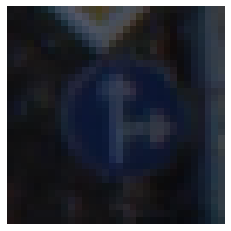

In [14]:
# Preprocessing
import cv2

# Printing an arbitrary image
plt.imshow(X_train[1000])
plt.axis('off')
print(X_train[1000].shape)  # To keep track how it changes through preprocessing

# To verify that we have identified the sign correctly. Label value is 36 which
# is consistent with the category for this image (check class number 36 of the
# images in the grid above)
print(y_train[1000])

# 1st preprocessing technique: **convert image to grayscale**

grayscale conversion is important for 2 main reasons:

1- When distinguishing between traffic signs, color is not a very significant feature to look for. The lighting in our images varies, and many of the traffic signs have similar color, reinforcing that it is not a very relevant piece of information. The features of the traffic signs that really matter are edges, curves, shape inside the sign. That's what the network should focus on.

2- When we convert an image from RGB to grayscale, we reduce the depth of our image from 3 to 1. This means that our network now requires fewer parameters as our input data will only have the depth of 1 channel. Therefore, our network will be more efficient, while we require less computing power to classify our data

(32, 32)


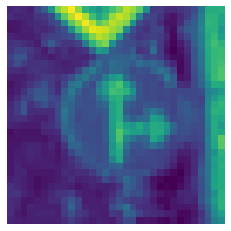

In [15]:
# cv2.cvtColor() converts between different color spaces
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

img = grayscale(X_train[1000])
plt.axis("off")
plt.imshow(img)
print(img.shape)